# Linking node with Command and goto

In [13]:
from langgraph.graph import StateGraph, END, START
from langgraph.types import Command
from typing import TypedDict

class AgentState(TypedDict):
    text: str 






### Create nodes and use goto to point from one node to the other

In [ ]:
def node_a(state:AgentState):
    print("In node A")
    return Command( # this updates the state dictionary
        goto="node_b",
        update={
            "text" : state['text'] + "a"
        }
    )

def node_b(state:AgentState):
    print("In Node B")
    return Command(
        goto="node_c",
        update={
            "text": state['text'] + "b"
        }
    )

def node_c(state:AgentState):
    print("In Node C")

    return Command(
        goto=END,
        update={
            "text":state['text'] + "c"
        
        }
    )

In [12]:
graph = StateGraph(AgentState)
graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_node("node_c", node_c)
# graph.add_edge(START,"node_a")
graph.set_entry_point("node_a")
app  = graph.compile()

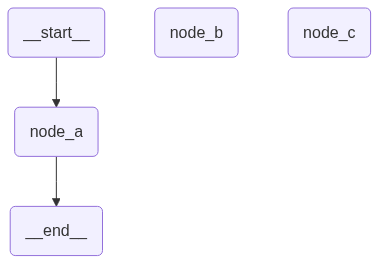

In [9]:
app

In [10]:
app.invoke({ "text":"hello"})

In node A
In Node B
In Node C


{'text': 'helloabc'}